In [1]:
import pandas as pd
import os

In [2]:
scoring = pd.read_pickle(os.path.join("..", "scoring.pickle"))
team_splits = pd.read_pickle(os.path.join("..", "team_splits.pickle"))

In [3]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [7]:
#filter row subset where condition
three_years = scoring.loc[(scoring.year > 2000) &
                          (scoring.year < 2004)]

# One record per player/year
three_years = three_years.drop_duplicates(subset=["playerID", "year"])

# Get three random players with complete history between 2001-2003
#get counts by players for those 3 years filtered above
counts = three_years["playerID"].value_counts()
#select players with 3 counts
ids = counts[counts == 3].sample(3).index

# Get actual records corresponding for those players
df3 = three_years.loc[three_years['playerID'].isin(ids)]
basic_df3 = df3[["playerID", "year", "G"]]

In [8]:
basic_df3

,playerID,year,G
5878,divisre01,2001,0.0
5879,divisre01,2002,0.0
5880,divisre01,2003,0.0
27940,wittbr01,2001,3.0
27941,wittbr01,2002,2.0
27942,wittbr01,2003,2.0
28570,zubovse01,2001,12.0
28571,zubovse01,2002,11.0
28572,zubovse01,2003,7.0


In [23]:
#Long to Wide format
pivot = basic_df3.pivot(index="playerID", columns="year", values="G")
pivot

year,2001,2002,2003
playerID,,,
divisre01,0.0,0.0,0.0
wittbr01,3.0,2.0,2.0
zubovse01,12.0,11.0,7.0


In [24]:
pivot.index

Index(['divisre01', 'wittbr01', 'zubovse01'], dtype='object', name='playerID')

In [25]:
pivot.columns

Index([2001, 2002, 2003], dtype='int64', name='year')

In [26]:
pivot.index.name = None
pivot.columns.name = None

In [27]:
pivot

,2001,2002,2003
divisre01,0.0,0.0,0.0
wittbr01,3.0,2.0,2.0
zubovse01,12.0,11.0,7.0


In [28]:
pivot.index.name = "playerID"
pivot.columns.name = "year"

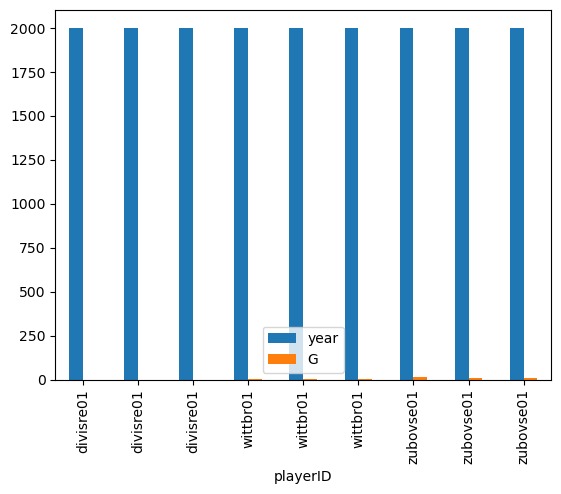

In [29]:
basic_df3.set_index("playerID").plot.bar();

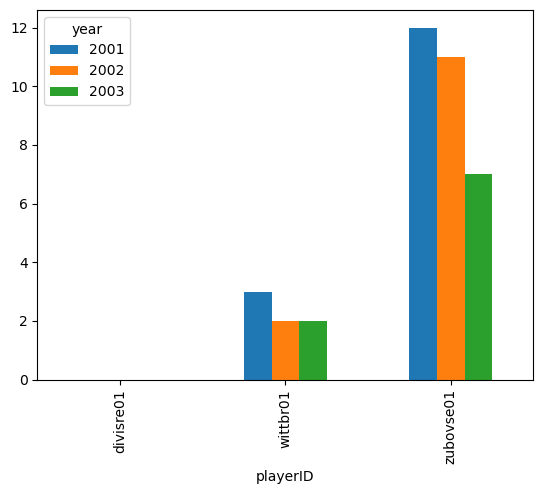

In [30]:
pivot.plot.bar();

In [31]:
pivot

year,2001,2002,2003
playerID,,,
divisre01,0.0,0.0,0.0
wittbr01,3.0,2.0,2.0
zubovse01,12.0,11.0,7.0


In [32]:
pivot = pivot.reset_index()
pivot.columns.name = None
pivot

,playerID,2001,2002,2003
0,divisre01,0.0,0.0,0.0
1,wittbr01,3.0,2.0,2.0
2,zubovse01,12.0,11.0,7.0


In [35]:
#Wide to Long format
pivot.melt() #melts every column, not generally used

,variable,value
0,playerID,divisre01
1,playerID,wittbr01
2,playerID,zubovse01
3,2001,0.0
4,2001,3.0
5,2001,12.0
6,2002,0.0
7,2002,2.0
8,2002,11.0
9,2003,0.0


In [36]:
pivot.melt(id_vars="playerID") #retains playerid column for reference but melts other data points

,playerID,variable,value
0,divisre01,2001,0.0
1,wittbr01,2001,3.0
2,zubovse01,2001,12.0
3,divisre01,2002,0.0
4,wittbr01,2002,2.0
5,zubovse01,2002,11.0
6,divisre01,2003,0.0
7,wittbr01,2003,2.0
8,zubovse01,2003,7.0


In [38]:
pivot.melt(id_vars="playerID", var_name="year", value_name="goals") #naming the other columns

,playerID,year,goals
0,divisre01,2001,0.0
1,wittbr01,2001,3.0
2,zubovse01,2001,12.0
3,divisre01,2002,0.0
4,wittbr01,2002,2.0
5,zubovse01,2002,11.0
6,divisre01,2003,0.0
7,wittbr01,2003,2.0
8,zubovse01,2003,7.0


In [40]:
pivot.melt(id_vars="playerID", value_vars=[2001, 2002],
           var_name="year", value_name="goals") #limit year variable to 2001,2002

,playerID,year,goals
0,divisre01,2001,0.0
1,wittbr01,2001,3.0
2,zubovse01,2001,12.0
3,divisre01,2002,0.0
4,wittbr01,2002,2.0
5,zubovse01,2002,11.0


In [42]:
larger_df3 = df3[["playerID", "tmID", "year", "G"]]
larger_df3

,playerID,tmID,year,G
5878,divisre01,STL,2001,0.0
5879,divisre01,STL,2002,0.0
5880,divisre01,STL,2003,0.0
27940,wittbr01,WAS,2001,3.0
27941,wittbr01,WAS,2002,2.0
27942,wittbr01,WAS,2003,2.0
28570,zubovse01,DAL,2001,12.0
28571,zubovse01,DAL,2002,11.0
28572,zubovse01,DAL,2003,7.0


In [45]:
try:
    larger_df3.pivot(index=["playerID", "tmID"],
                     columns="year", values="G") #goals scored by player for team by year
except Exception as e:
    print(e)
        

'tmID'


In [46]:
larger_df3 = df3[["playerID", "year", "G", "A"]]
larger_df3

,playerID,year,G,A
5878,divisre01,2001,0.0,0.0
5879,divisre01,2002,0.0,0.0
5880,divisre01,2003,0.0,0.0
27940,wittbr01,2001,3.0,7.0
27941,wittbr01,2002,2.0,9.0
27942,wittbr01,2003,2.0,10.0
28570,zubovse01,2001,12.0,32.0
28571,zubovse01,2002,11.0,44.0
28572,zubovse01,2003,7.0,35.0


In [52]:
test = larger_df3.pivot(index="playerID", columns="year",
                        values=["G", "A"])
test #year and playerid is index like multiIndex

G                A            
year       2001  2002 2003  2001  2002  2003
playerID                                    
divisre01   0.0   0.0  0.0   0.0   0.0   0.0
wittbr01    3.0   2.0  2.0   7.0   9.0  10.0
zubovse01  12.0  11.0  7.0  32.0  44.0  35.0

In [53]:
test.columns

MultiIndex([('G', 2001),
            ('G', 2002),
            ('G', 2003),
            ('A', 2001),
            ('A', 2002),
            ('A', 2003)],
           names=[None, 'year'])